In [10]:
#Statystyka opisowa:
#srednia ar, mediana, dominanta

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, norm, probplot, mannwhitneyu, chi2_contingency
import statsmodels.api as sm
from statsmodels.formula.api import ols


ModuleNotFoundError: No module named 'statsmodels'

In [ ]:
df = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")
df.head()


In [ ]:
df.shape[0]

In [ ]:
#Statystyka opisowa:
#Bell curve testing. As we have 374 rows, Test Kołmogorowa-Smirnowa was selected.
#rozklad normalny + opis jaki test wykonamy

In [ ]:
#Sleep duration by Gender

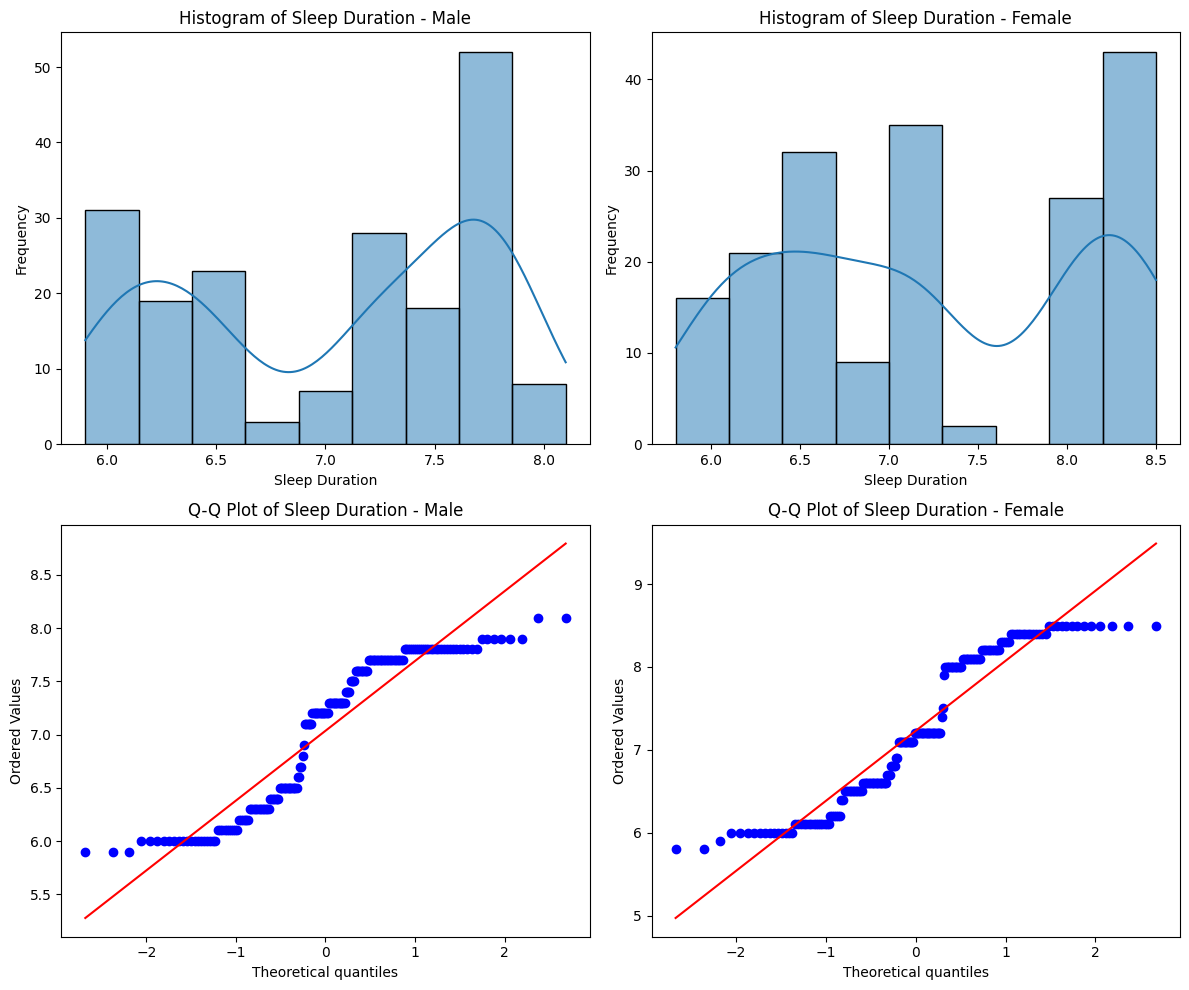

In [9]:

# Plot histogram and Q-Q plot for each group
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Histogram for males
sns.histplot(df[df['Gender'] == 'Male']['SleepDuration'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Histogram of Sleep Duration - Male')
axes[0, 0].set_xlabel('Sleep Duration')
axes[0, 0].set_ylabel('Frequency')

# Histogram for females
sns.histplot(df[df['Gender'] == 'Female']['SleepDuration'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Histogram of Sleep Duration - Female')
axes[0, 1].set_xlabel('Sleep Duration')
axes[0, 1].set_ylabel('Frequency')

# Q-Q plot for males
probplot(df[df['Gender'] == 'Male']['SleepDuration'], dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('Q-Q Plot of Sleep Duration - Male')

# Q-Q plot for females
probplot(df[df['Gender'] == 'Female']['SleepDuration'], dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot of Sleep Duration - Female')

plt.tight_layout()
plt.show()



In [14]:

# Perform Shapiro-Wilk test
stat_male, p_male = shapiro(df[df['Gender'] == 'Male']['SleepDuration'])
stat_female, p_female = shapiro(df[df['Gender'] == 'Female']['SleepDuration'])

rounded_p_male = round(p_male, 13)
rounded_p_female = round(p_female, 13)

print(f'Shapiro-Wilk test for males: Statistic={stat_male}, p-value={rounded_p_male}')
print(f'Shapiro-Wilk test for females: Statistic={stat_female}, p-value={rounded_p_female}')



Shapiro-Wilk test for males: Statistic=0.8724829881313924, p-value=1.51e-11
Shapiro-Wilk test for females: Statistic=0.8985763558917751, p-value=6.361e-10


In [ ]:
#Statystyka opisowa:
#odchylenie standardowe, wariancja, percentyle, outliery, korelacja, regresja liniowa

In [ ]:
#Shapiro-Wilk Test: A p-value is less than 0.05 indicates that the data does significantly deviate from normality.

In [ ]:
#Testy nieparametryczne

In [ ]:
#As per Shapiro-Wilk Test p-value is less than 0.05. To study SleepDuration vs Gender non-parametric U Mann Whitney was performed

In [18]:

sleep_male = df[df['Gender'] == 'Male']['SleepDuration']
sleep_female = df[df['Gender'] == 'Female']['SleepDuration']

# Perform Mann-Whitney U test
stat, p_value = mannwhitneyu(sleep_male, sleep_female)

print(f'Statistic: {stat}')
print(f'P-value: {p_value}')

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print('Reject the null hypothesis: There is a significant difference in sleep duration between males and females.')
else:
    print('Fail to reject the null hypothesis: There is no significant difference in sleep duration between males and females.')

Statistic: 14929.5
P-value: 0.014440351736077347
Reject the null hypothesis: There is a significant difference in sleep duration between males and females.


In [ ]:
#As Chi sqaure Test is used to determine whether there is a relationship between two categorical variables,
#it was performed to study relathionship between Gender and BMI

In [4]:
# Create contingency table
contingency_table = pd.crosstab(df['Gender'], df['BMICategory'])

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print results
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

Chi-square statistic: 50.705361629325594
P-value: 9.760467523403023e-12
Degrees of freedom: 2
Expected frequencies:
[[106.84491979   4.94652406  73.20855615]
 [109.15508021   5.05347594  74.79144385]]


In [ ]:
#wnioski

In [ ]:
#Sleep duration vs Age

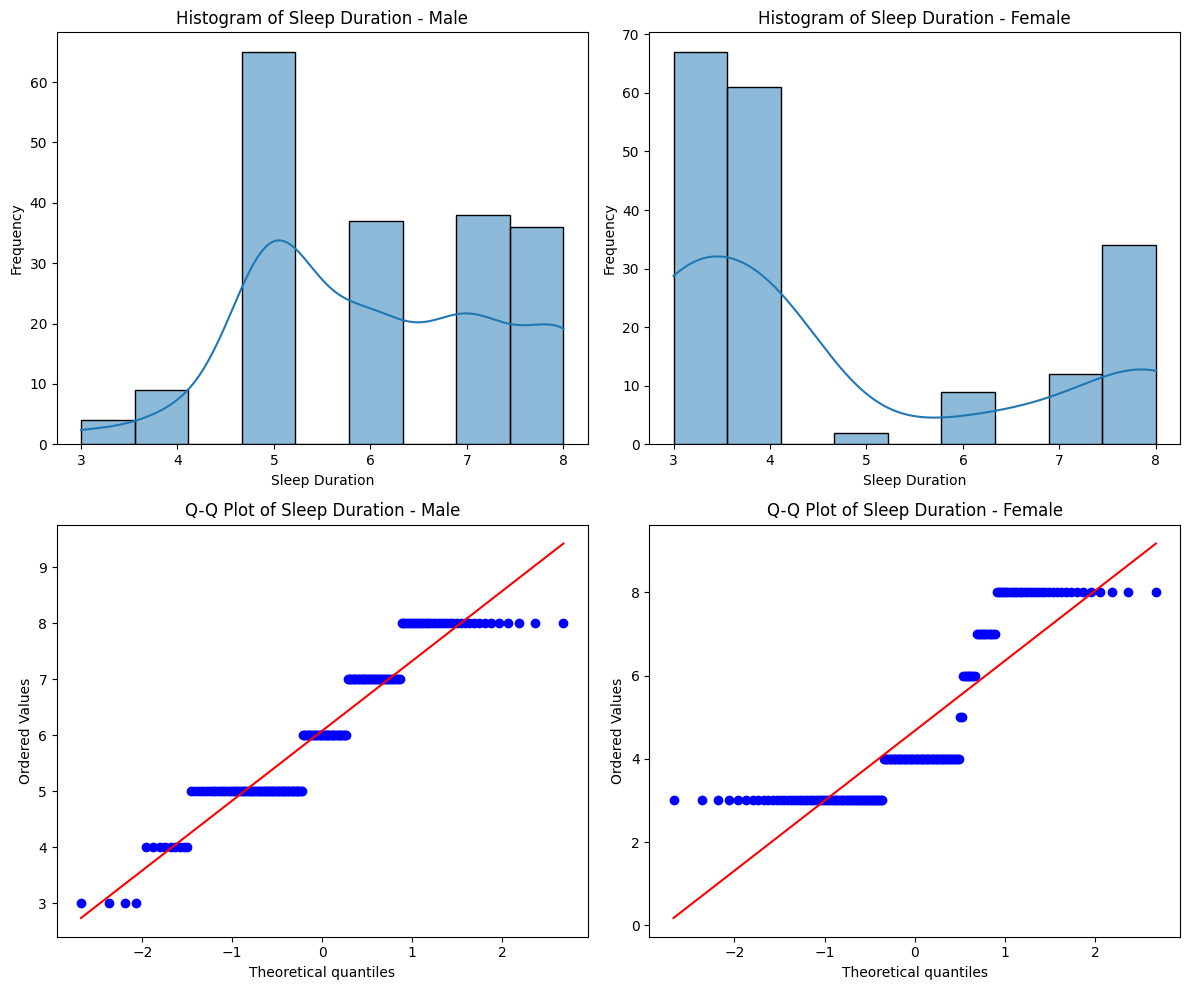

In [7]:


# Plot histogram and Q-Q plot for each group
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Histogram for males
sns.histplot(df[df['Gender'] == 'Male']['StressLevel'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Histogram of Sleep Duration - Male')
axes[0, 0].set_xlabel('Sleep Duration')
axes[0, 0].set_ylabel('Frequency')

# Histogram for females
sns.histplot(df[df['Gender'] == 'Female']['StressLevel'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Histogram of Sleep Duration - Female')
axes[0, 1].set_xlabel('Sleep Duration')
axes[0, 1].set_ylabel('Frequency')

# Q-Q plot for males
probplot(df[df['Gender'] == 'Male']['StressLevel'], dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('Q-Q Plot of Sleep Duration - Male')

# Q-Q plot for females
probplot(df[df['Gender'] == 'Female']['StressLevel'], dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot of Sleep Duration - Female')

plt.tight_layout()
plt.show()




In [9]:
df['SleepDisorders'] = df['SleepDisorder'].apply(lambda x: 'No' if x == 'None' else 'Yes')

KeyError: 'SleepDisorders'

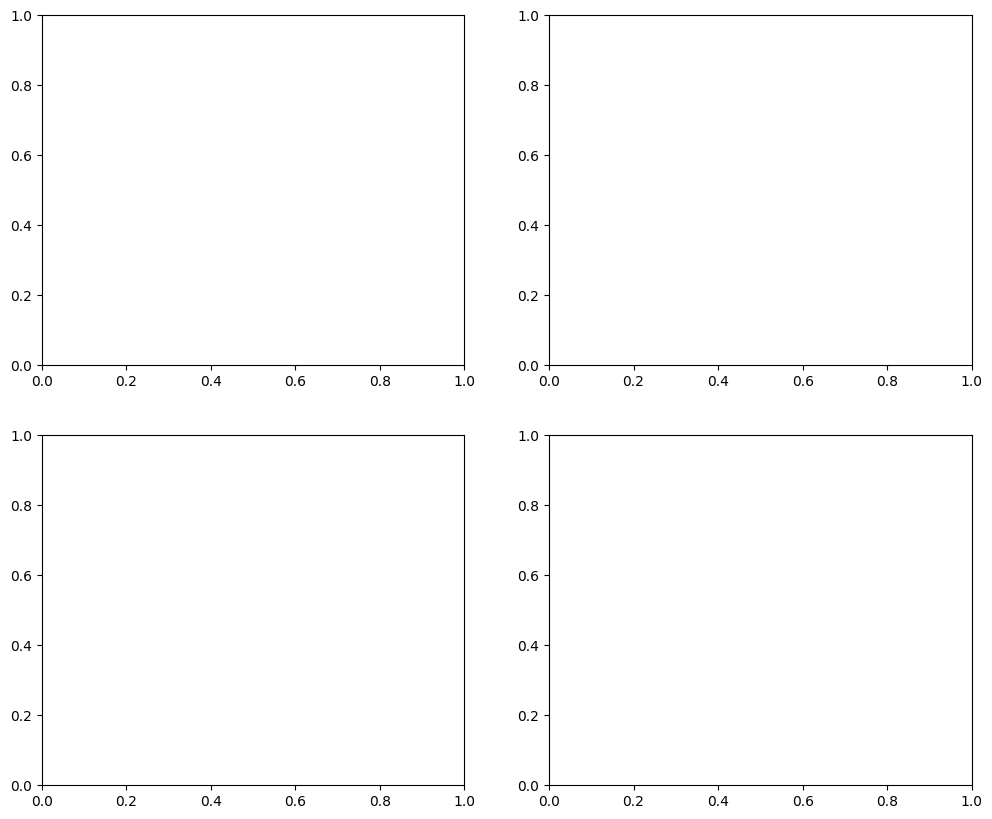

In [5]:

# Plot histogram and Q-Q plot for each group
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Histogram for males
sns.histplot(df[df['SleepDisorders'] == 'No']['StressLevel'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Histogram of Sleep Duration - Male')
axes[0, 0].set_xlabel('Sleep Duration')
axes[0, 0].set_ylabel('Frequency')

# Histogram for females
sns.histplot(df[df['SleepDisorders'] == 'Yes']['StressLevel'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Histogram of Sleep Duration - Female')
axes[0, 1].set_xlabel('Sleep Duration')
axes[0, 1].set_ylabel('Frequency')

# Q-Q plot for males
probplot(df[df['SleepDisorders'] == 'No']['StressLevel'], dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('Q-Q Plot of Sleep Duration - Male')

# Q-Q plot for females
probplot(df[df['SleepDisorders'] == 'Yes']['StressLevel'], dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot of Sleep Duration - Female')

plt.tight_layout()
plt.show()




In [4]:
# Perform T-test
stat_male, p_male = shapiro(df[df['SleepDisorders'] == 'No']['StressLevel'])
stat_female, p_female = shapiro(df[df['SleepDisorders'] == 'Yes']['StressLevel'])

rounded_p_male = round(p_male, 13)
rounded_p_female = round(p_female, 13)

print(f'Shapiro-Wilk test for males: Statistic={stat_male}, p-value={rounded_p_male}')
print(f'Shapiro-Wilk test for females: Statistic={stat_female}, p-value={rounded_p_female}')


KeyError: 'SleepDisorders'

In [ ]:
#Annova Test

In [2]:
model = ols('SleepDuration ~ AgeGroup', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

NameError: name 'ols' is not defined

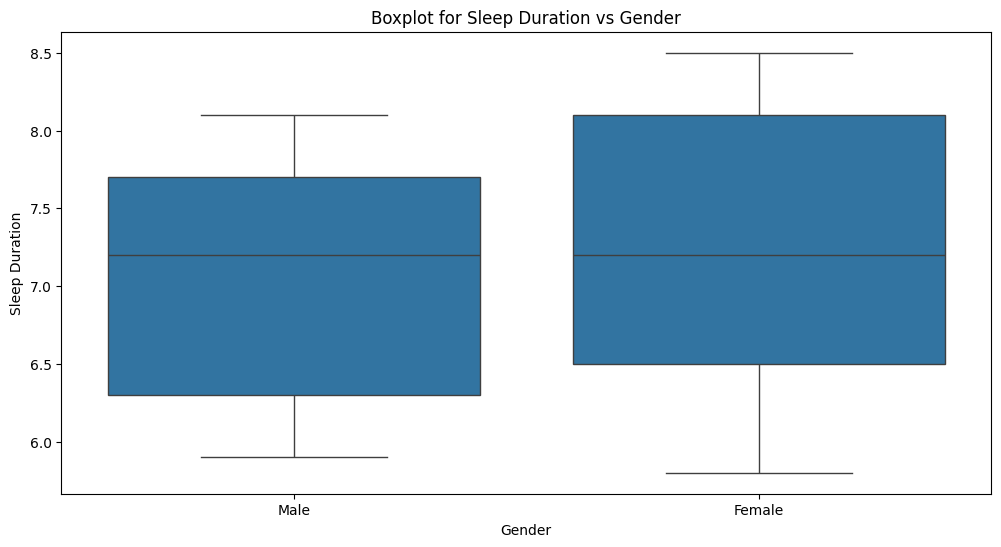

In [15]:
# Checking for outliers using boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Gender', y='SleepDuration', data=df)
plt.title('Boxplot for Sleep Duration vs Gender')
plt.xlabel('Gender')
plt.ylabel('Sleep Duration')
plt.show()